In [ ]:
from google.colab import drive
from google.colab.patches  import cv2_imshow
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.data import coffee
from numpy.core.memmap import ndarray

חלק 1 - הצפנת מידע בתמונה





הפונקציה מחזירה ערך בינארי של מחרוזת , מחזירה רשימה של מחרוזות כאשר כל מחרוזת מייצגת תו אחד מהמחרוזת המקורית שקיבלה

In [ ]:
def toBinary(a):
  l,m=[],[]
  for i in a:
    l.append(ord(i))
  for i in l:
    m.append(bin(i)[2:])
  index=0
  for i in m :
      if (len(i)<8):
       newM=''
       for j in range(8-len(i)):
          newM+='0'
       m[index]=str(newM)+str(m[index])
      index+=1

  return m

last one is even(0)
middle ones are odd(1)

אי זוגי ממשיך
זוגי לא ממשיך

In [ ]:
def encrypt(img1,messege):
    img=img1.copy()
    blue=ndarray.flatten(img[::,::,0])
    green=ndarray.flatten(img[::,::,1])
    red=ndarray.flatten(img[::,::,2])
    height=img.shape[0]
    width=img.shape[1]
    bin_val=toBinary(messege)
    if(len(messege)*3<=len(blue)):#checks if word it too long
        for i in range(len(bin_val)):
            str_num=str(bin_val[i])
            encrypt_1_chr(blue,green,red,str_num,(i!=len(bin_val)-1),i*3)


        blue = np.reshape(blue, (height, width))
        red = np.reshape(red, (height, width))
        green = np.reshape(green, (height, width))
        encrypted_img=cv2.merge((blue,green,red))
        return encrypted_img
    else:
        print('messege too long for the image')
        return np.zeros((height,width,3),dtype=int)

In [ ]:
def encrypt_1_chr(blue,green,red,bin_num,flag,j):
  i=0
  while(i<9):
        a=int(bin_num[i])
        b=int(bin_num[i+1])

        if(i<6):
            c=int(bin_num[2+i])
        else:
            c=int(flag)
        if((blue[j]%2!=a%2).any()):
            if(blue[j]==0):
                blue[j]+=1
            else:
                 blue[j]-=1
        if((green[j]%2!=b%2).any()):
            if(green[j]==0):
                green[j]+=1
            else:
                 green[j]-=1
        if((red[j]%2!=c%2).any()):
            if(red[j]==0):
                red[j]+=1
            else:
              red[j]-=1
        i+=3
        j+=1



חלק 2 - הוצאה של מידע מתמונה


הפונקציה מקבלת רשימה של מחרוזות שמייצגות מספרים בינארים ומחזירה מחרוזת המורכבת מהערכים שאותם הערכים הבינארים ברשימה מייצגים

In [ ]:
def bitList2string(b):
    word=""
    for x in b :
        word=word+chr(int(x, 2))
    return word

הפונקציה מקבלת תמונה עם ערכים מוצפנים בה ומוציאה מתוך התמונה רשימה של מחרוזות המייצגות את הערכים הבינארים שמוצפנים בתמונה

In [ ]:
def Lst_of_encrypted_val(img):
    encrypted_lst=[]
    blue,green,red=cv2.split(img)
    blue=ndarray.flatten(blue)
    green=ndarray.flatten(green)
    red=ndarray.flatten(red)
    i=0
    flag=True
    while ((i<len(blue)) and (flag==True)) :
        binary_str=""
        j=0
        for j in range(3) :
            if(j!=2):
             binary_str+=str(blue[i+j]%2)
             binary_str+=str(green[i+j]%2)
             binary_str+=str(red[i+j]%2)
            else :
             binary_str+=str(blue[i+j]%2)
             binary_str+=str(green[i+j]%2)
             flag=bool(red[i+j]%2)

        i=i+j+1
        encrypted_lst.append(binary_str)
    return encrypted_lst

פונקציה ראשית שמקבלת את התמונה ומשתמשת בשתי תתי הפונקציות כדי למצוא את המילה המוצפנת



In [ ]:
def Find_whats_encrypted(img) :
    lst=Lst_of_encrypted_val(img)
    word=bitList2string(lst)
    return word


Enter a message to encrpyt : Michel Jordan Has Retired 4 times during his career , which is something that isnt so familiar with professional players
Encrypted message : Michel Jordan Has Retired 4 times during his career , which is something that isnt so familiar with professional players


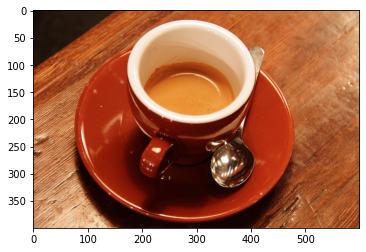

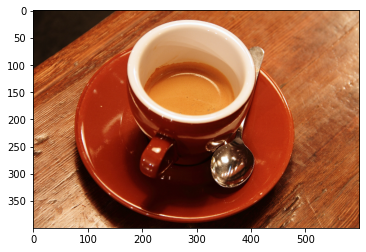

In [ ]:
img=coffee()
word=str(input("Enter a message to encrpyt : "))
img2=encrypt(img,word)
plt.imshow(img2)
plt.figure()
plt.imshow(img)
print("Encrypted message : " +Find_whats_encrypted(img2))